In [75]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [76]:
def display_summary_statistics(data):
    """
    Display summary statistics of the dataset.
    
    """
    print("\nSummary statistics of the dataset:")
    print(data.describe())

# Load the dataset
file_path = r"salary_prediction_data.csv"
salary_data = pd.read_csv(file_path)
salary_data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [77]:
def plot_education_salary_bar_chart(data):
    
    """
    Create a bar chart to compare average salaries across different education levels.

    Args:
        data (DataFrame): Dataset containing education level and salary information.

    Returns:
        None
    """
    # Calculate the average salary for each education level
    avg_salary_by_education = data.groupby('Education')['Salary'].mean().sort_values()

    # Plot the bar chart
    plt.figure(figsize=(10, 6), dpi=144)
    avg_salary_by_education.plot(kind='bar', color='skyblue')
    plt.title('Average Salary by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [78]:
def plot_experience_salary_scatter(data):
    
    """
    Create a scatter plot to visualize the relationship between experience and salary.

    Args:
        data (DataFrame): Dataset containing experience and salary information.

    Returns:
        None
    """
    
    # Extract the relevant columns
    experience = data["Experience"]
    salary = data["Salary"]

    # Create a scatter plot
    plt.figure(figsize=(10, 6), dpi=144)
    plt.scatter(experience, salary, color='blue', alpha=0.5)

    # Add labels and title
    plt.title('Relation between Experience and Salary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')

    # Show plot
    plt.show()

In [79]:
def plot_heatmap(df):
    """
    Generates a heatmap to visualize the correlation between different factors influencing salary levels.

    Args:
    data_path (str): Path to the dataset CSV file.

    Returns:
    None
    """

    # Replace categorical values with numerical representations
    education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
    location_mapping = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
    job_title_mapping = {'Analyst': 0, 'Director': 1, 'Engineer': 2, 'Manager': 3}
    gender_mapping = {'Male': 0, 'Female': 1}

    df['Education'] = df['Education'].map(education_mapping)
    df['Location'] = df['Location'].map(location_mapping)
    df['Job_Title'] = df['Job_Title'].map(job_title_mapping)
    df['Gender'] = df['Gender'].map(gender_mapping)

    # Compute correlation matrix
    corr_matrix = df.corr()
    
     # Print tabular correlation matrix
    print("Correlation Matrix:")
    print(corr_matrix)

    # Plot heatmap
    plt.figure(figsize=(10, 8), dpi=144)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Pearson Correlation Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()

In [80]:
# Display the first few rows of the dataset
display_first_few_rows(salary_data)

First few rows of the dataset:
     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175


In [81]:
# Display summary statistics of the dataset
display_summary_statistics(salary_data)


Summary statistics of the dataset:
        Experience          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean     14.771000    42.377000  105558.404239
std       8.341111    13.609412   28256.972075
min       1.000000    20.000000   33510.510669
25%       7.000000    30.000000   85032.141517
50%      15.000000    43.000000  104314.518315
75%      22.000000    55.000000  126804.047524
max      29.000000    64.000000  193016.602150


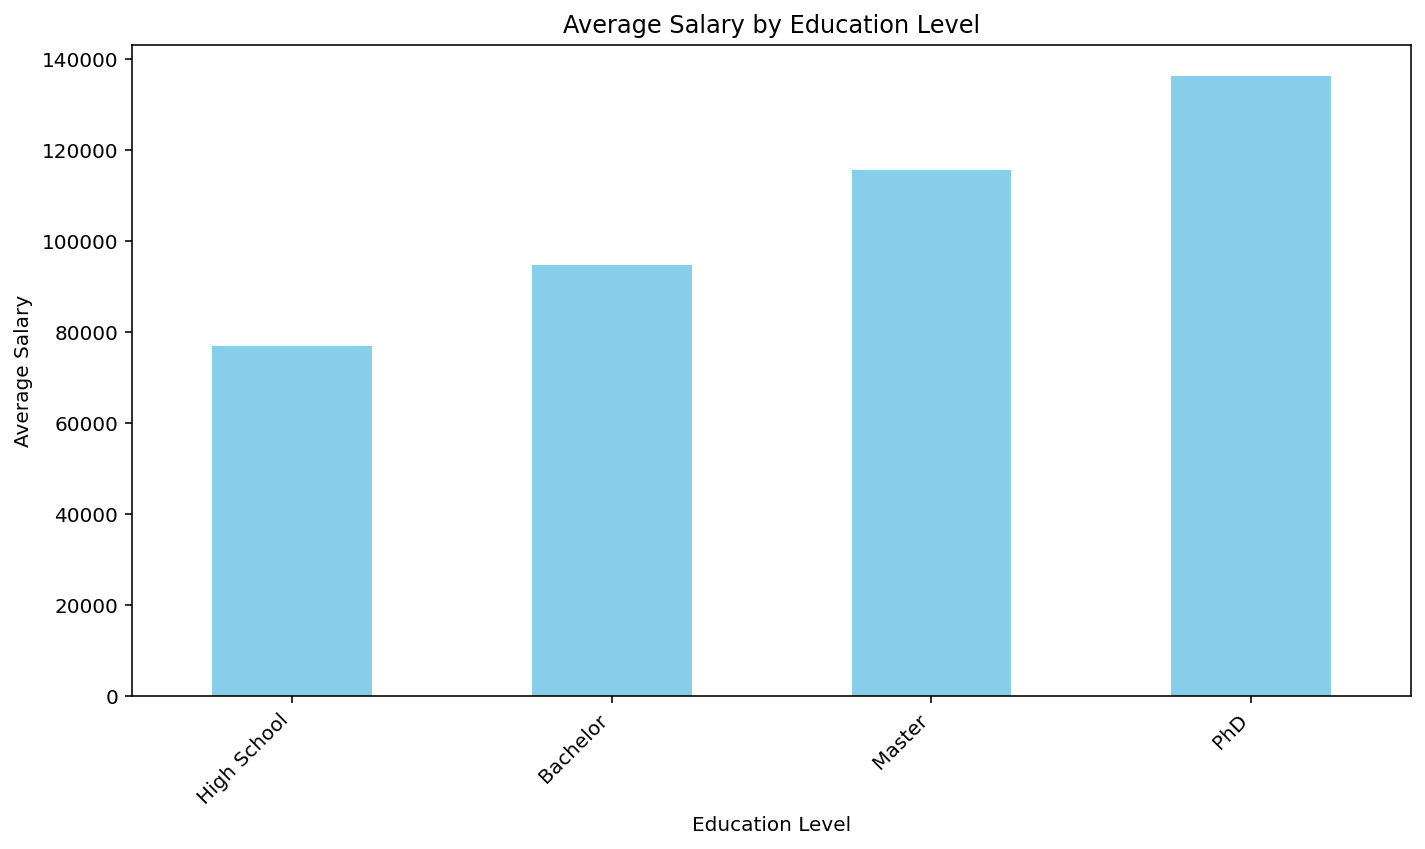

In [82]:
# Plot the bar chart
plot_education_salary_bar_chart(salary_data)

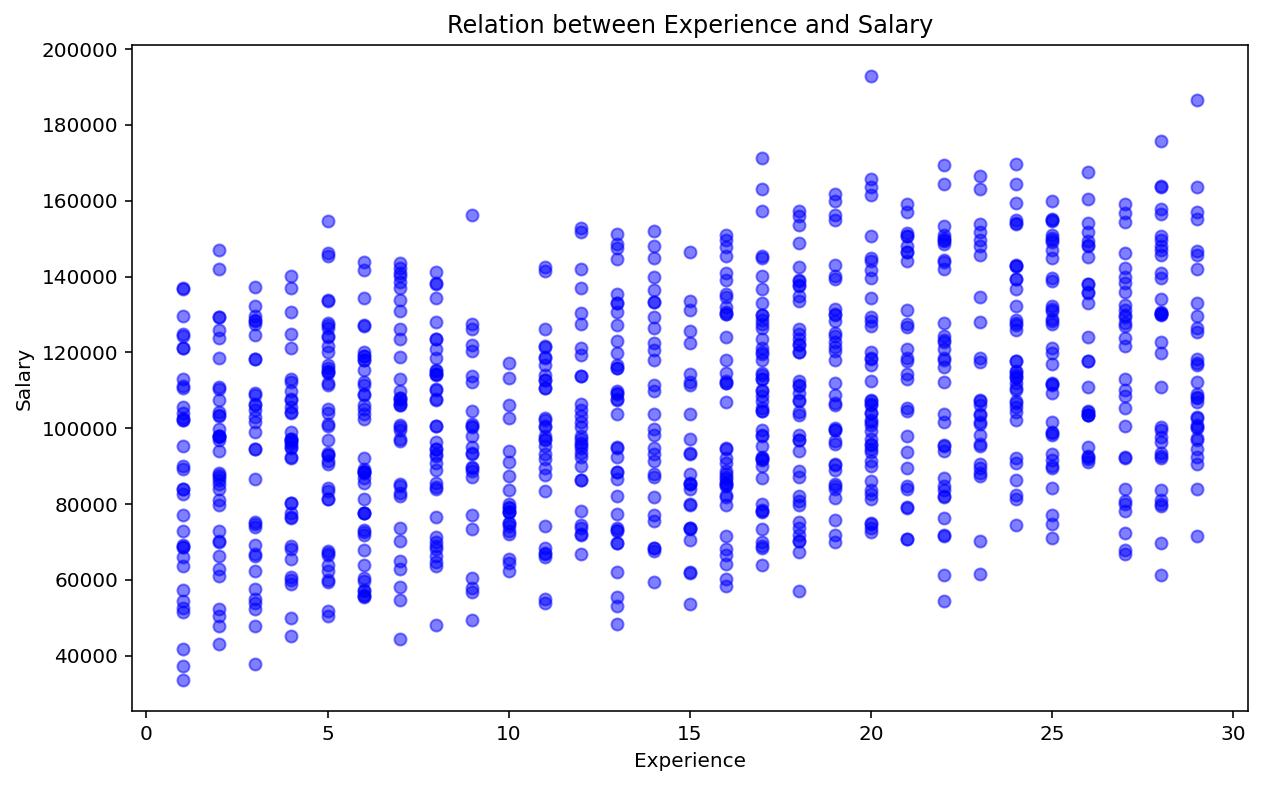

In [83]:
plot_experience_salary_scatter(salary_data)

Correlation Matrix:
            Education  Experience  Location  Job_Title       Age    Gender  \
Education    1.000000    0.021650  0.014401  -0.052384 -0.070744 -0.030625   
Experience   0.021650    1.000000  0.096275   0.059504  0.044296  0.020602   
Location     0.014401    0.096275  1.000000   0.015504 -0.006347 -0.044695   
Job_Title   -0.052384    0.059504  0.015504   1.000000 -0.002767  0.041861   
Age         -0.070744    0.044296 -0.006347  -0.002767  1.000000 -0.049055   
Gender      -0.030625    0.020602 -0.044695   0.041861 -0.049055  1.000000   
Salary       0.791505    0.341918  0.177018   0.083639 -0.053174 -0.028173   

              Salary  
Education   0.791505  
Experience  0.341918  
Location    0.177018  
Job_Title   0.083639  
Age        -0.053174  
Gender     -0.028173  
Salary      1.000000  


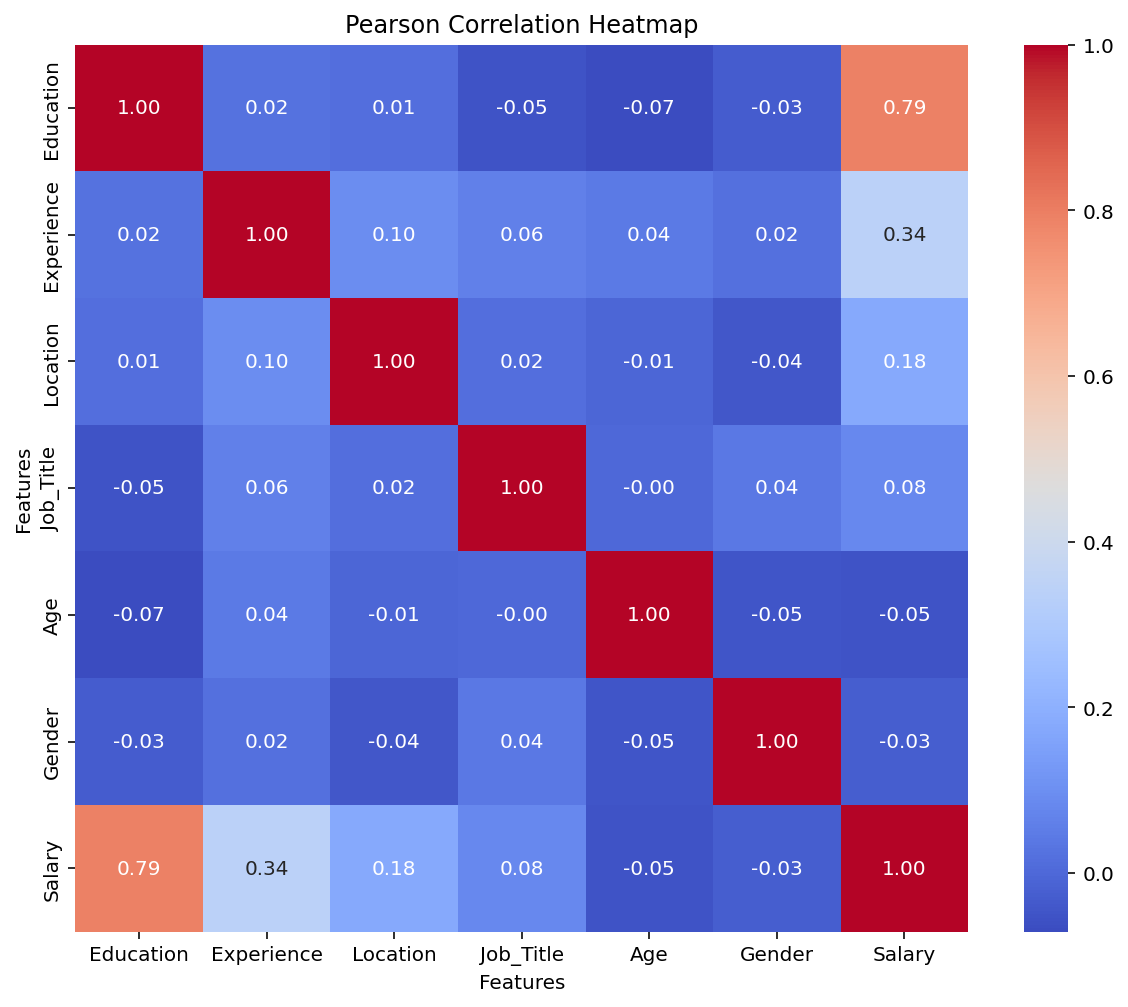

In [84]:
plot_heatmap(salary_data)

In [85]:
# Initialize a dictionary to store the statistics
statistics = {}

# Calculate statistics for each numerical column
for column in numerical_columns:
    statistics[column] = {
        'Skewness': skew(salary_data[column]),
        'Kurtosis': kurtosis(salary_data[column], fisher=True),  # Using Fisher's definition of kurtosis
        'Standard Deviation': salary_data[column].std(),
        'Variance': salary_data[column].var()
    }

# Print the calculated statistics
for column, stats in statistics.items():
    print(f"Statistics for {column}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.2f}")
    print()  

Statistics for Experience:
Skewness: 0.00
Kurtosis: -1.20
Standard Deviation: 8.34
Variance: 69.57

Statistics for Age:
Skewness: -0.06
Kurtosis: -1.28
Standard Deviation: 13.61
Variance: 185.22

Statistics for Salary:
Skewness: 0.10
Kurtosis: -0.58
Standard Deviation: 28256.97
Variance: 798456470.84

